Found 92 EEG files.
Reading /Users/rasmusarnmark/Desktop/Sem4/fagprojekt/data/326A_FG_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    5498.00 ms
        0 CTF compensation matrices available
Not setting metadata
298 matching events found
No baseline correction applied
0 projection items activated
<EpochsFIF | 298 events (all good), -0.5 – 5.498 s (baseline off), ~436.6 MiB, data loaded,
 'T1P': 30
 'T1Pn': 29
 'T3P': 30
 'T3Pn': 30
 'T12P': 30
 'T12Pn': 29
 'T13P': 30
 'T13Pn': 30
 'T23P': 30
 'T23Pn': 30>


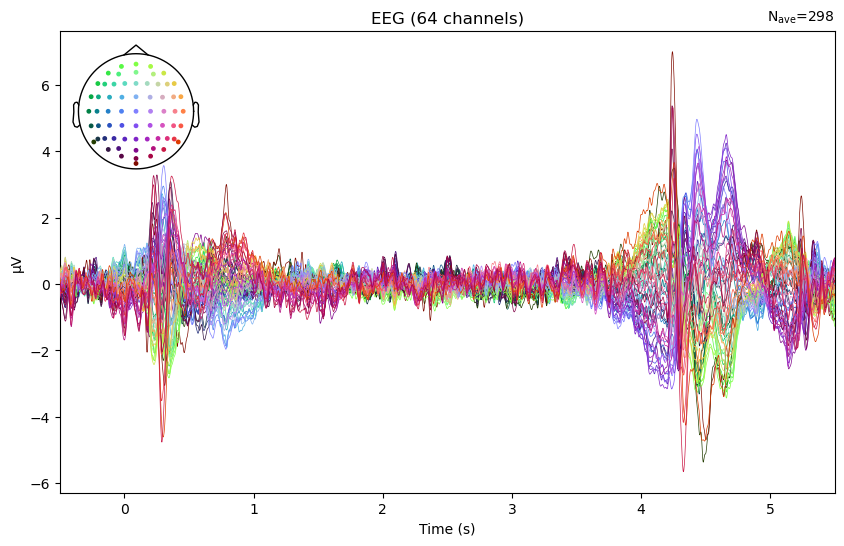

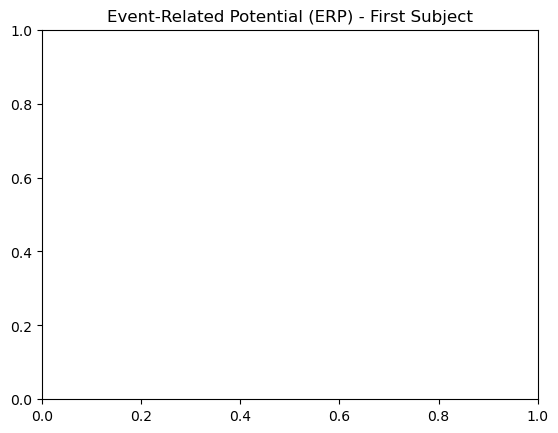

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Available columns in force_df: Index(['Triad_id', 'Block', 'Trial', 'Condition_id', 'Condition',
       'Force_level', 'TargetForce', 'Trial_time', 'Participant', 'Force',
       'dForce'],
      dtype='object')
   Triad_id  Block  Trial  Condition_id Condition  Force_level  TargetForce  \
0       301      1     10            10     T23Pn            4           28   
1       301      1     10            10     T23Pn            4           28   
2       301      1     10            10     T23Pn            4           28   
3       301      1     10            10     T23Pn            4           28   
4       301      1     10            10     T23Pn            4           28   

   Trial_time Participant     Force     dForce  
0        0.00          P1  0.013662 -27.986338  
1        0.04          P1  0.013662 -27.986338  
2        0.08      

/opt/anaconda3/envs/agency/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


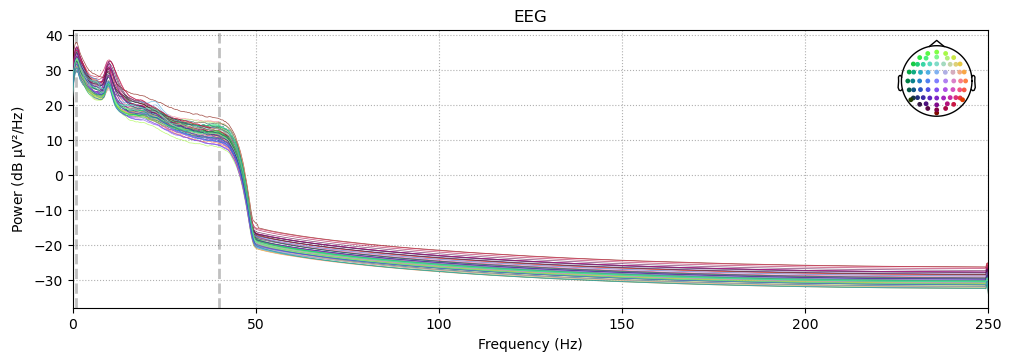

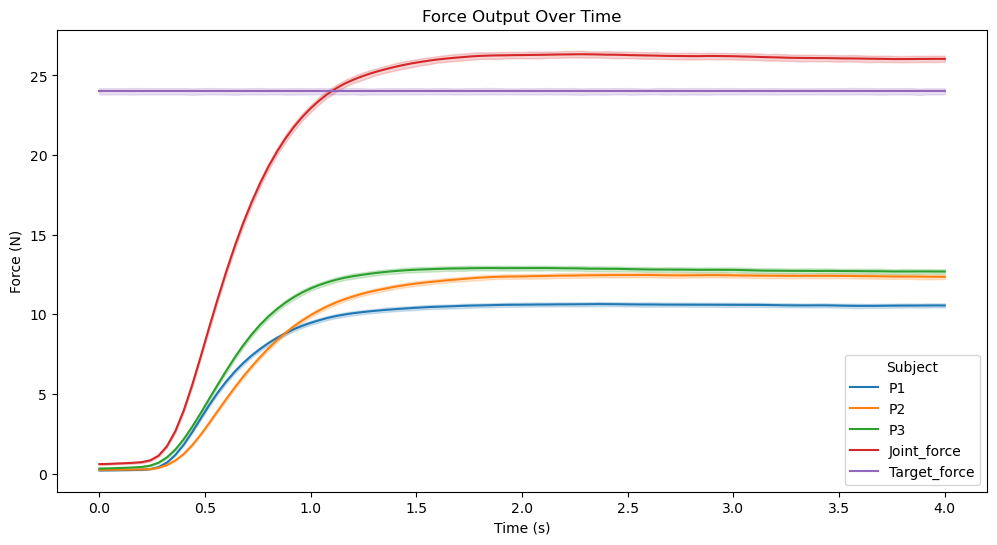

In [7]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Define data folder path
data_folder = "data"  # Update with actual path

# Load all EEG files
eeg_files = glob.glob(os.path.join(data_folder, "*_FG_preprocessed-epo.fif"))
print(f"Found {len(eeg_files)} EEG files.")

# Load the first EEG file as an example
eeg_data = mne.read_epochs(eeg_files[0], preload=True)
print(eeg_data)

# Check if EEG data contains events
if len(eeg_data.events) == 0:
    print("Warning: No events found in EEG data. ERP plot may be empty.")

# Plot ERP for a selected subject
fig, ax = plt.subplots(figsize=(10, 6))
eeg_data.average().plot(axes=ax, show=True)
plt.title("Event-Related Potential (ERP) - First Subject")
plt.show()

# Power Spectral Density (PSD) Analysis
eeg_data.compute_psd().plot()

# Load Force Output Data (from .pkl file)
force_df = pd.read_pickle("forcedf.pkl")  # Update with actual path

# Check available columns
print("Available columns in force_df:", force_df.columns)
print(force_df.head())

# Ensure correct column names for plotting
expected_columns = {'time': 'Trial_time', 'force': 'Force', 'subject': 'Participant'}
missing_columns = [col for col in expected_columns.keys() if expected_columns[col] not in force_df.columns]
if missing_columns:
    print(f"Warning: Missing expected columns in force_df - {missing_columns}")
else:
    # Visualizing Force Output Over Time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=force_df['Trial_time'], y=force_df['Force'], hue=force_df['Participant'])
    plt.title('Force Output Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Force (N)')
    plt.legend(title='Subject')
    plt.show()
